In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, RobustScaler, Normalizer

In [ ]:
df = pd.read_csv("/content/Electric_Vehicle_Population_Data.csv")  # na_values=['?']
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,187279214,POINT (-120.1871 46.33949),PACIFICORP,5.307700e+10
1,KNDC3DLC5N,Yakima,Yakima,WA,98902.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,210098241,POINT (-120.52041 46.59751),PACIFICORP,5.307700e+10
2,5YJYGDEEXL,Snohomish,Everett,WA,98208.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,44.0,121781950,POINT (-122.18637 47.89251),PUGET SOUND ENERGY INC,5.306104e+10
3,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,14.0,180778377,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10
4,KNDCC3LD5K,Kitsap,Bremerton,WA,98312.0,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,26.0,2581225,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250654,7SAYGDEE7S,Franklin,Pasco,WA,99301.0,2025,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,9.0,274986323,POINT (-119.09467 46.23542),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF F...,5.302102e+10
250655,2C4RC1L77J,Pierce,Tacoma,WA,98407.0,2018,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33.0,0.0,27.0,128901748,POINT (-122.51134 47.29238),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
250656,7SAYGDEF6P,Pierce,Bonney Lake,WA,98391.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,31.0,258537660,POINT (-122.17144 47.19175),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
250657,WBY8P6C54K,King,Seattle,WA,98117.0,2019,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153.0,0.0,36.0,477080334,POINT (-122.38418 47.70044),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


In [ ]:
df.shape

(250659, 17)

In [ ]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250659 entries, 0 to 250658
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         250659 non-null  object 
 1   County                                             250653 non-null  object 
 2   City                                               250653 non-null  object 
 3   State                                              250659 non-null  object 
 4   Postal Code                                        250653 non-null  float64
 5   Model Year                                         250659 non-null  int64  
 6   Make                                               250659 non-null  object 
 7   Model                                              250659 non-null  object 
 8   Electric Vehicle Type                              250659 non-null  object

In [ ]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,250653.000000,250659.000000,250638.000000,250638.000000,250076.000000,2.506590e+05,2.506530e+05
mean,98176.796089,2021.628252,44.073002,727.403107,28.994994,2.392132e+08,5.297386e+10
std,2555.064640,3.021254,82.412875,6917.315299,14.862288,6.671019e+07,1.618543e+09
min,1731.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,18.000000,2.111858e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,33.000000,2.575374e+08,5.303303e+10
75%,98382.000000,2024.000000,37.000000,0.000000,42.000000,2.728702e+08,5.305394e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.792548e+08,6.601095e+10


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
for col in df.columns:
  print(col, df[col].value_counts())
  print("----------------------------------------")

VIN (1-10) VIN (1-10)
7SAYGDEE7P    1193
7SAYGDEE6P    1183
7SAYGDEEXP    1173
7SAYGDEE5P    1151
7SAYGDEE2P    1143
              ... 
WBS83FK07T       1
KM8KR4AE7N       1
KMHC05LH2H       1
3GNKDKRJ2S       1
YV4H60CVXP       1
Name: count, Length: 15108, dtype: int64
----------------------------------------
County County
King          124211
Snohomish      31031
Pierce         20829
Clark          15279
Thurston        9175
               ...  
Kane               1
Hall               1
Sussex             1
Olmsted            1
Barnstable         1
Name: count, Length: 225, dtype: int64
----------------------------------------
City City
Seattle            39768
Bellevue           12204
Vancouver           9322
Redmond             8653
Bothell             8253
                   ...  
Gales Ferry            1
Providence             1
North Las Vegas        1
Ewa Beach              1
Kansas City            1
Name: count, Length: 822, dtype: int64
--------------------------------------

In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,6
City,6
State,0
Postal Code,6
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
numeric_data = df.select_dtypes(include=['number']).columns
df[numeric_data]

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
0,98932.0,2022,0.0,0.0,15.0,187279214,5.307700e+10
1,98902.0,2022,0.0,0.0,15.0,210098241,5.307700e+10
2,98208.0,2020,291.0,0.0,44.0,121781950,5.306104e+10
3,98908.0,2016,84.0,0.0,14.0,180778377,5.307700e+10
4,98312.0,2019,26.0,0.0,26.0,2581225,5.303508e+10
...,...,...,...,...,...,...,...
250654,99301.0,2025,0.0,0.0,9.0,274986323,5.302102e+10
250655,98407.0,2018,33.0,0.0,27.0,128901748,5.305306e+10
250656,98391.0,2023,0.0,0.0,31.0,258537660,5.305307e+10
250657,98117.0,2019,153.0,0.0,36.0,477080334,5.303300e+10


In [ ]:
for col in numeric_data:
  df[col] = df[col].fillna(df[col].median())

In [ ]:
categorical_data = df.select_dtypes(include=['object']).columns
df[categorical_data]

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
0,5YJSA1E65N,Yakima,Granger,WA,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-120.1871 46.33949),PACIFICORP
1,KNDC3DLC5N,Yakima,Yakima,WA,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-120.52041 46.59751),PACIFICORP
2,5YJYGDEEXL,Snohomish,Everett,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.18637 47.89251),PUGET SOUND ENERGY INC
3,3C3CFFGE1G,Yakima,Yakima,WA,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-120.60199 46.59817),PACIFICORP
4,KNDCC3LD5K,Kitsap,Bremerton,WA,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC
...,...,...,...,...,...,...,...,...,...,...
250654,7SAYGDEE7S,Franklin,Pasco,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-119.09467 46.23542),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF F...
250655,2C4RC1L77J,Pierce,Tacoma,WA,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.51134 47.29238),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
250656,7SAYGDEF6P,Pierce,Bonney Lake,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.17144 47.19175),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
250657,WBY8P6C54K,King,Seattle,WA,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.38418 47.70044),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)


In [ ]:
for col in categorical_data:
  df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


# **Numerical Features**

Text(0.5, 0.98, 'Numerical Features')

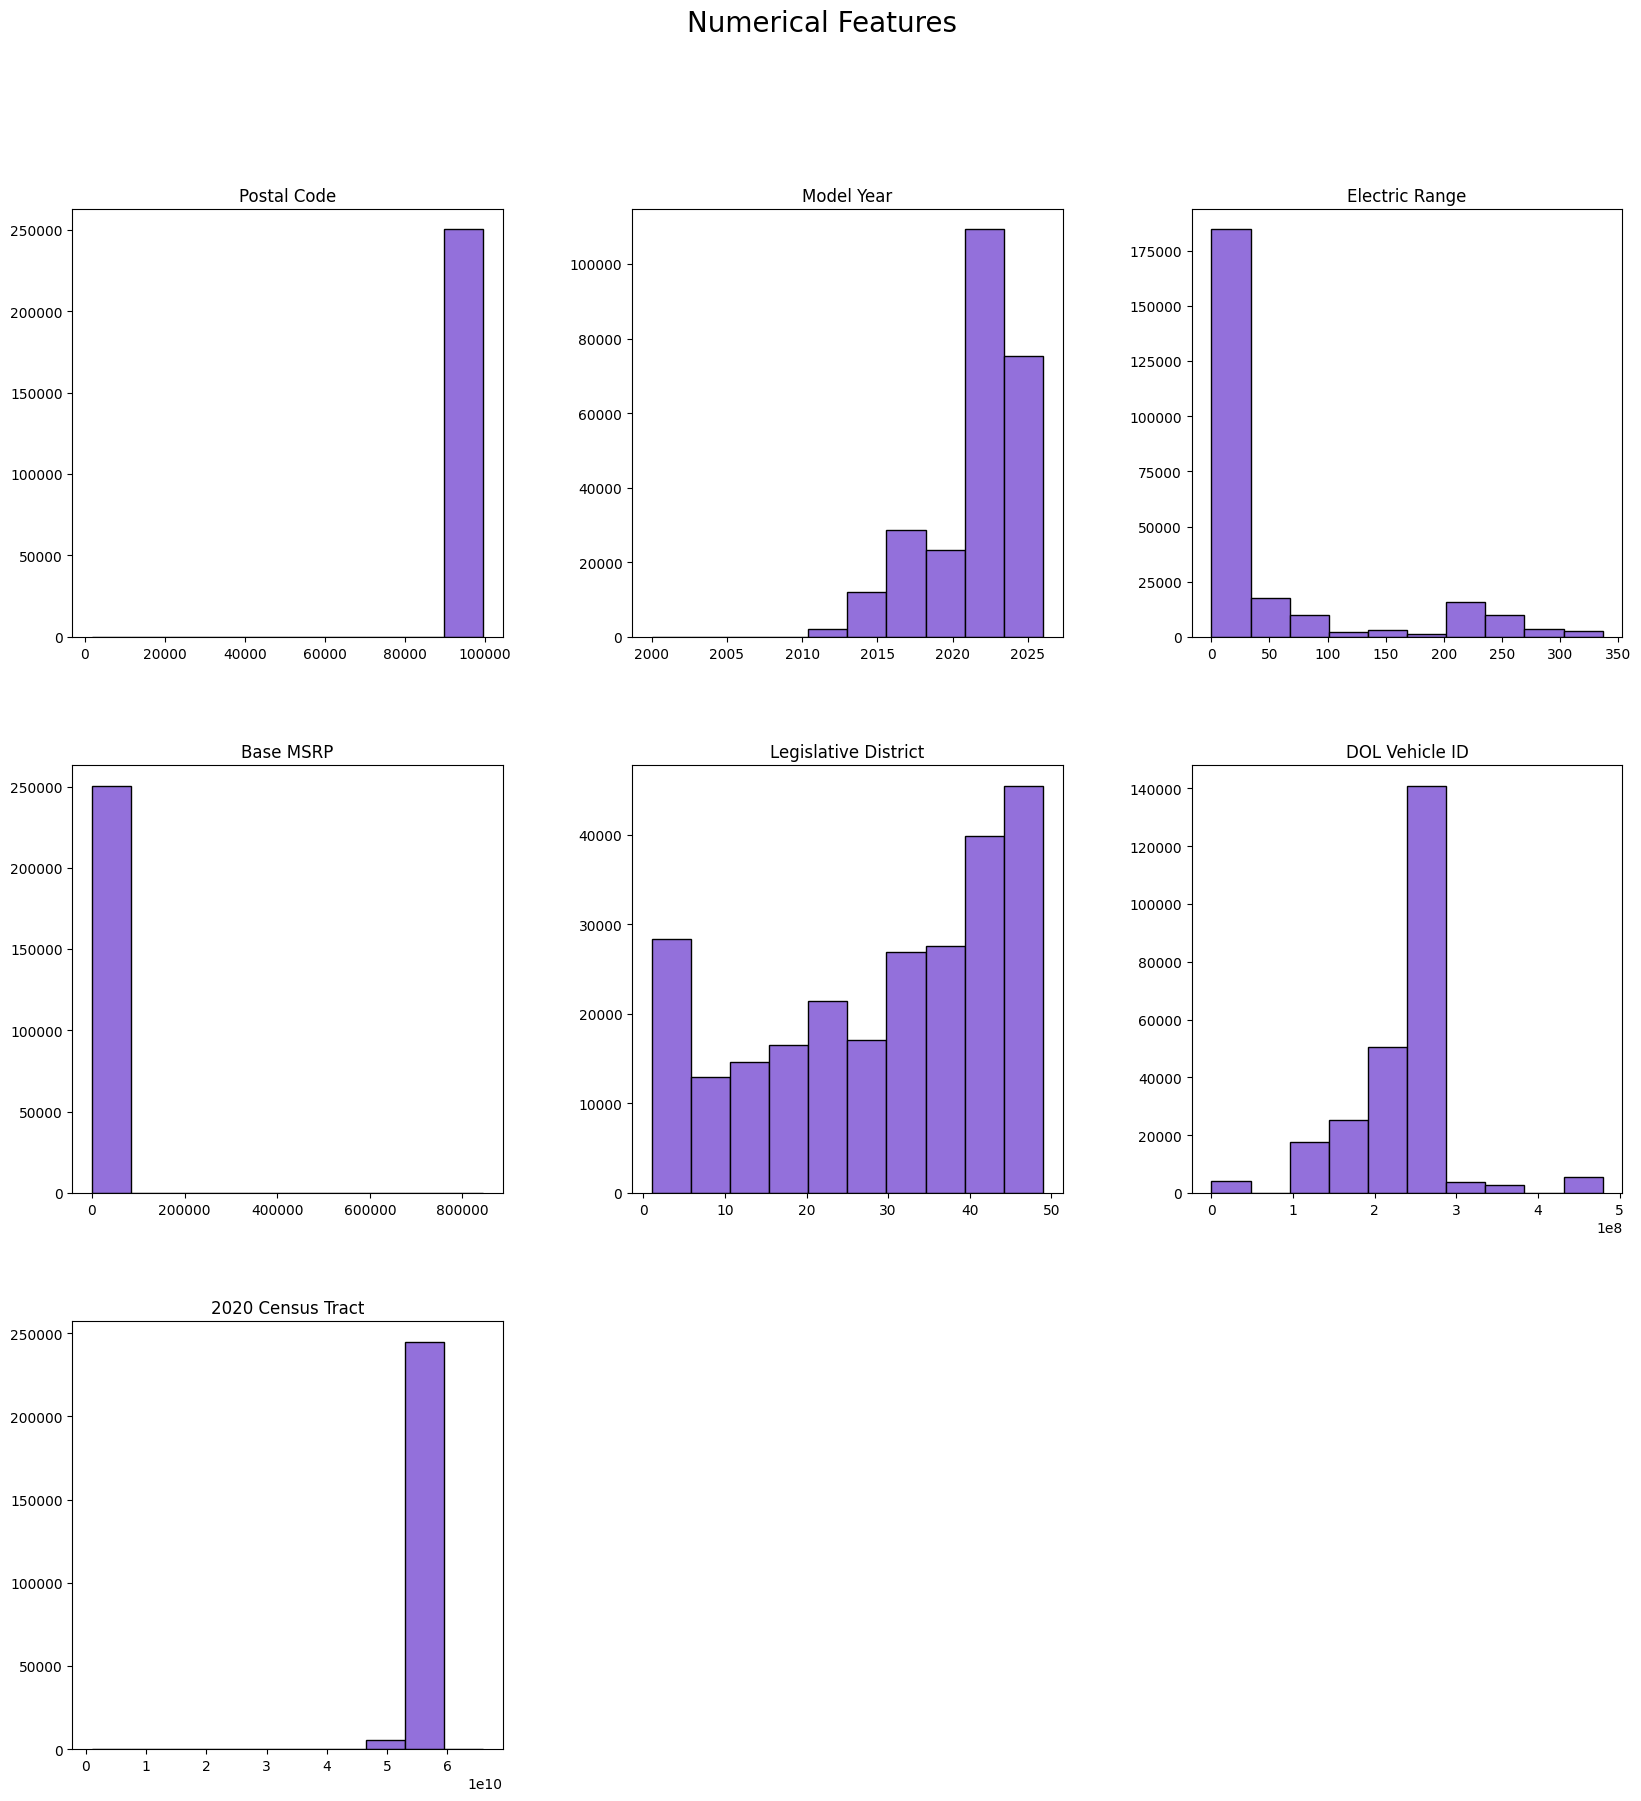

In [ ]:
df[numeric_data].hist(figsize=(20,20), color='mediumpurple', edgecolor='black', grid=False)
plt.suptitle('Numerical Features', fontsize=20)

In [ ]:
df.drop(['VIN (1-10)', 'County', 'City', 'Postal Code', 'Base MSRP', 'DOL Vehicle ID', '2020 Census Tract', 'Vehicle Location', 'State', 'Model'], axis=1, inplace=True)

In [ ]:
numeric_data = df.select_dtypes(include=['number']).columns
df[numeric_data]

,Model Year,Electric Range,Legislative District
0,2022,0.0,15.0
1,2022,0.0,15.0
2,2020,291.0,44.0
3,2016,84.0,14.0
4,2019,26.0,26.0
...,...,...,...
250654,2025,0.0,9.0
250655,2018,33.0,27.0
250656,2023,0.0,31.0
250657,2019,153.0,36.0


Text(0.5, 0.98, 'Numerical Features')

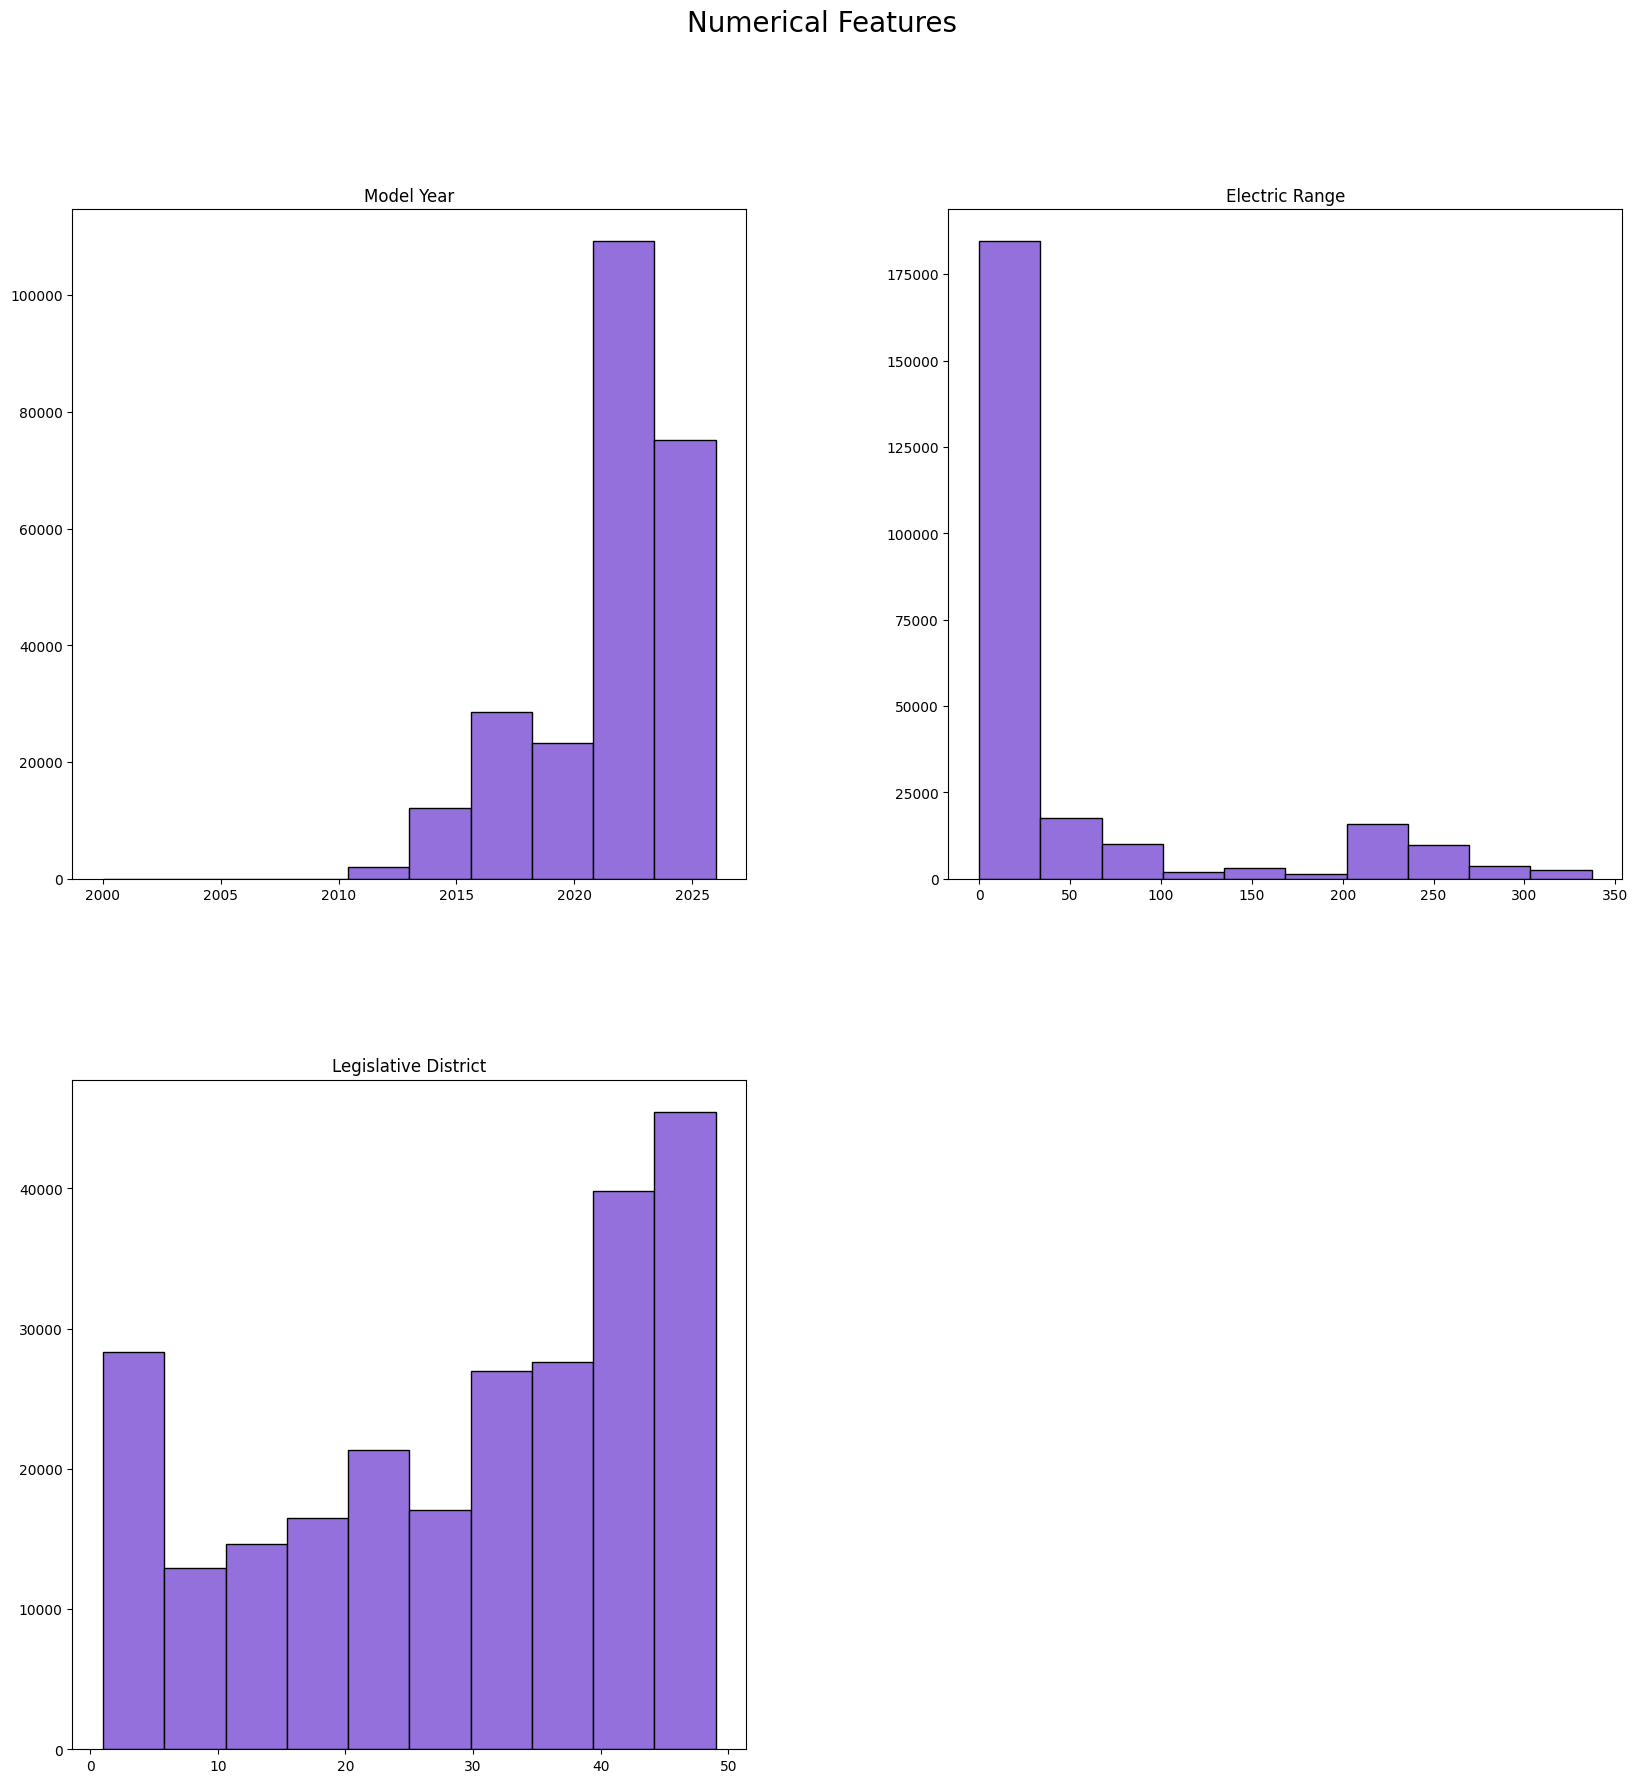

In [ ]:
df[numeric_data].hist(figsize=(20,20), color='mediumpurple', edgecolor='black', grid=False)
plt.suptitle('Numerical Features', fontsize=20)

(array([184570.,  17596.,   9948.,   2057.,   3019.,   1431.,  15815.,
          9805.,   3733.,   2685.]),
 array([  0. ,  33.7,  67.4, 101.1, 134.8, 168.5, 202.2, 235.9, 269.6,
        303.3, 337. ]),
 <BarContainer object of 10 artists>)

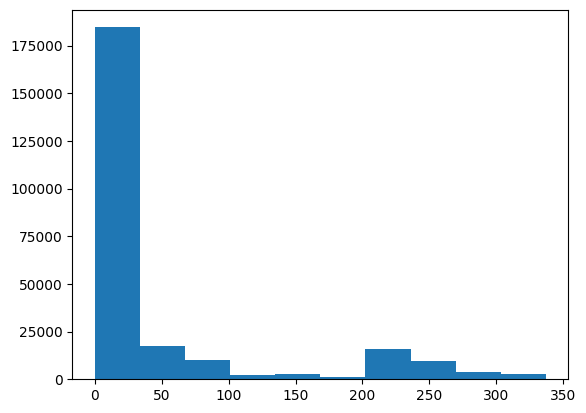

In [ ]:
plt.hist(df['Electric Range'], bins=10)

In [ ]:
df['Electric Range'] = np.log1p(df['Electric Range'])

(array([1.52176e+05, 1.80000e+01, 0.00000e+00, 1.01500e+03, 3.54200e+03,
        2.10730e+04, 2.40170e+04, 1.03290e+04, 5.09500e+03, 3.33940e+04]),
 array([0.        , 0.58230459, 1.16460918, 1.74691377, 2.32921836,
        2.91152295, 3.49382754, 4.07613213, 4.65843672, 5.24074131,
        5.8230459 ]),
 <BarContainer object of 10 artists>)

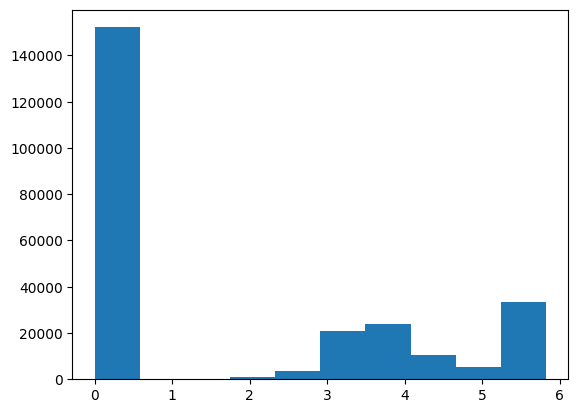

In [ ]:
plt.hist(df['Electric Range'], bins=10)

(array([1.00000e+01, 1.00000e+00, 0.00000e+00, 4.30000e+01, 2.08400e+03,
        1.20730e+04, 2.86000e+04, 2.33620e+04, 1.09267e+05, 7.52190e+04]),
 array([2000. , 2002.6, 2005.2, 2007.8, 2010.4, 2013. , 2015.6, 2018.2,
        2020.8, 2023.4, 2026. ]),
 <BarContainer object of 10 artists>)

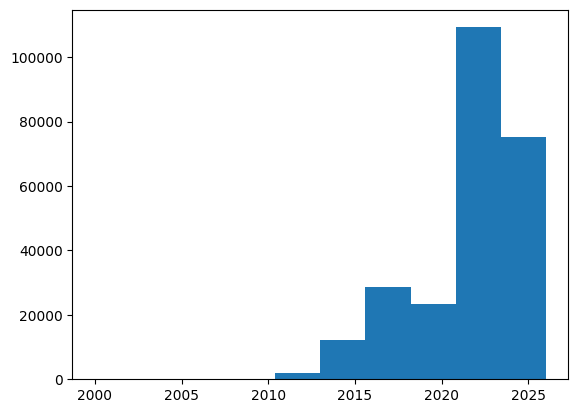

In [ ]:
plt.hist(df['Model Year'], bins=10)

In [ ]:
df['Electric Range'] = np.power(df['Electric Range'], 2)

(array([152194.,   1362.,  14402.,  23508.,  10649.,   9023.,   3033.,
          3094.,  23559.,   9835.]),
 array([ 0.        ,  3.39078635,  6.7815727 , 10.17235905, 13.5631454 ,
        16.95393175, 20.3447181 , 23.73550445, 27.1262908 , 30.51707715,
        33.9078635 ]),
 <BarContainer object of 10 artists>)

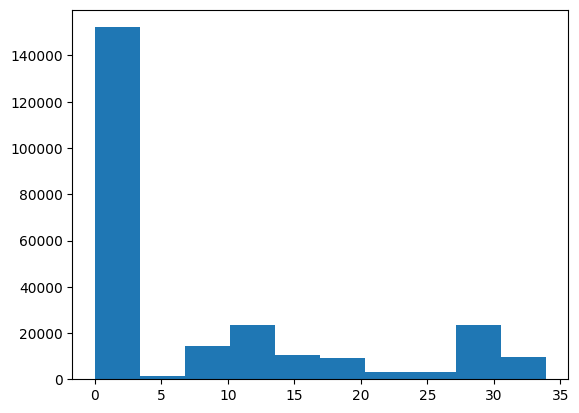

In [ ]:
plt.hist(df['Electric Range'], bins=10)

(array([28318., 12922., 14656., 16500., 21380., 17040., 26956., 27601.,
        39804., 45482.]),
 array([ 1. ,  5.8, 10.6, 15.4, 20.2, 25. , 29.8, 34.6, 39.4, 44.2, 49. ]),
 <BarContainer object of 10 artists>)

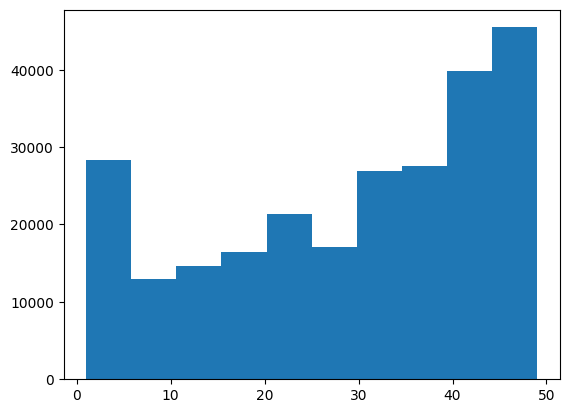

In [ ]:
plt.hist(df['Legislative District'], bins=10)

In [ ]:
df['Legislative District'] = np.power(df['Legislative District'], 2)

(array([55896., 22958., 22981., 12255., 23682., 20807., 12058., 27511.,
        30579., 21932.]),
 array([1.000e+00, 2.410e+02, 4.810e+02, 7.210e+02, 9.610e+02, 1.201e+03,
        1.441e+03, 1.681e+03, 1.921e+03, 2.161e+03, 2.401e+03]),
 <BarContainer object of 10 artists>)

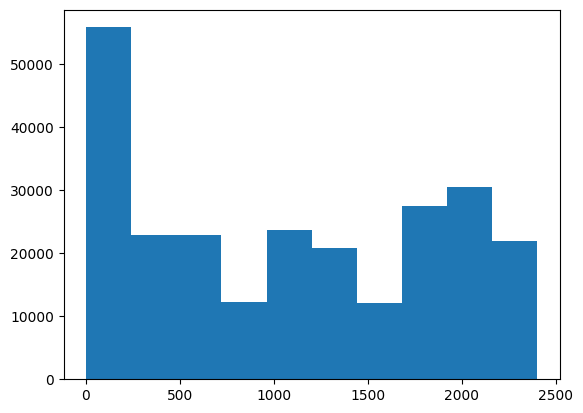

In [ ]:
plt.hist(df['Legislative District'], bins=10)

In [ ]:
df[numeric_data].corr()

,Model Year,Electric Range,Legislative District
Model Year,1.000000,-0.643175,0.005623
Electric Range,-0.643175,1.000000,-0.005930
Legislative District,0.005623,-0.005930,1.000000


<Axes: >

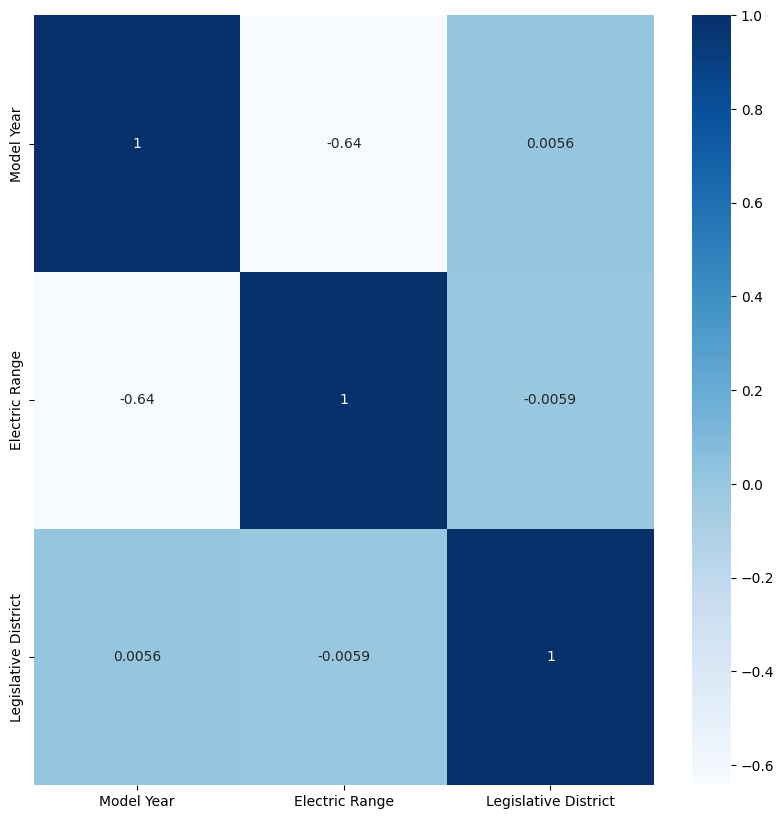

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_data].corr(), annot=True, cmap='Blues')

In [ ]:
df

,Model Year,Make,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,Electric Utility
0,2022,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.000000,225.0,PACIFICORP
1,2022,KIA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.000000,225.0,PACIFICORP
2,2020,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,32.225534,1936.0,PUGET SOUND ENERGY INC
3,2016,FIAT,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,19.737150,196.0,PACIFICORP
4,2019,KIA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,10.862541,676.0,PUGET SOUND ENERGY INC
...,...,...,...,...,...,...,...
250654,2025,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.000000,81.0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF F...
250655,2018,CHRYSLER,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,12.435219,729.0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
250656,2023,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.000000,961.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
250657,2019,BMW,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,25.370892,1296.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)


In [ ]:
for col in numeric_data:
  print(f'The min {col} = {df[col].min()}, and The max {col} = {df[col].max()}')

The min Model Year = 2000, and The max Model Year = 2026
The min Electric Range = 0.0, and The max Electric Range = 33.907863500901634
The min Legislative District = 1.0, and The max Legislative District = 2401.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7a0b5259ede0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a0b5259f290>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a0b5259eb70>],
 'medians': [<matplotlib.lines.Line2D at 0x7a0b5259f860>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a0b5259fb00>],
 'means': []}

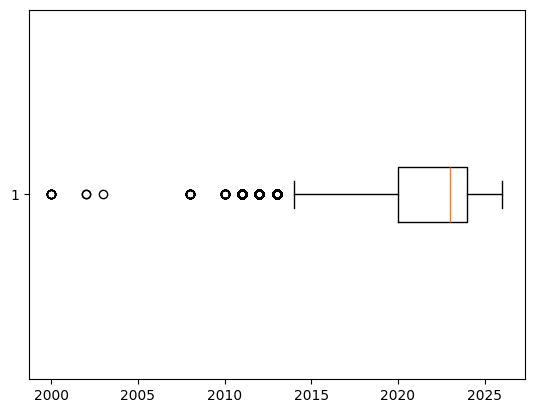

In [ ]:
plt.boxplot(df['Model Year'], vert = False)

In [ ]:
# Q1_Model_Year = df['Model Year'].quantile(0.25)
# Q3_Model_Year = df['Model Year'].quantile(0.75)
# IQR_Model_Year = Q3_Model_Year - Q1_Model_Year
# Max_model_year = Q3_Model_Year + (1.5 * IQR_Model_Year)
# Min_model_year = Q1_Model_Year - (1.5 * IQR_Model_Year)

In [ ]:
# df = df[(df['Model Year'] >= Min_model_year) & (df['Model Year'] <= Max_model_year)]

In [ ]:
# plt.boxplot(df['Model Year'], vert = False)

In [ ]:
df.shape

(250659, 7)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a0b5260d9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a0b5260df40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a0b5260d6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a0b5260e420>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a0b5260e690>],
 'means': []}

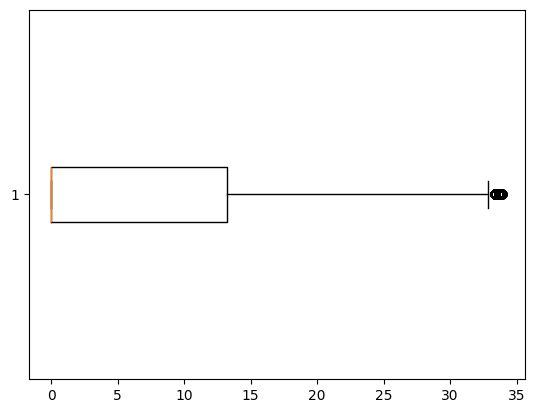

In [ ]:
plt.boxplot(df['Electric Range'], vert = False)

In [ ]:
# Q1_Electric_Range = df['Electric Range'].quantile(0.25)
# Q3_Electric_Range = df['Electric Range'].quantile(0.75)
# IQR_Electric_Range = Q3_Electric_Range - Q1_Electric_Range
# Max_Electric_Range = Q3_Electric_Range + (1.5 * IQR_Electric_Range)
# Min_Electric_Ranger = Q1_Electric_Range - (1.5 * IQR_Electric_Range)

In [ ]:
# df = df[(df['Electric Range'] >= Max_Electric_Range)]

In [ ]:
# plt.boxplot(df['Electric Range'], vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a0b5247d970>,
 'caps': [<matplotlib.lines.Line2D at 0x7a0b5247ddf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a0b5247d6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a0b5247e300>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a0b5247e5d0>],
 'means': []}

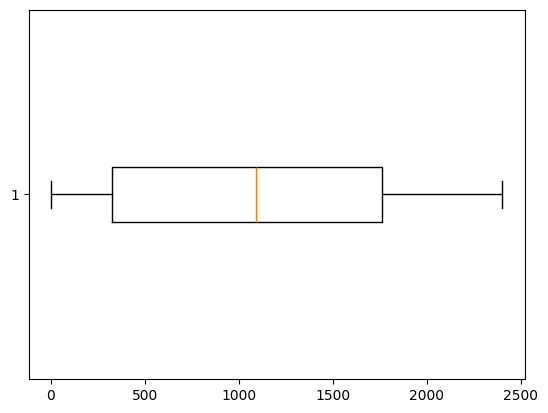

In [ ]:
plt.boxplot(df['Legislative District'], vert = False)

In [ ]:
df.shape

(250659, 7)

# **Categorical Data**

In [ ]:
categorical_data = df.select_dtypes(include=['object']).columns
df[categorical_data]

,Make,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility
0,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,PACIFICORP
1,KIA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,PACIFICORP
2,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC
3,FIAT,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PACIFICORP
4,KIA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,PUGET SOUND ENERGY INC
...,...,...,...,...
250654,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF F...
250655,CHRYSLER,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
250656,TESLA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
250657,BMW,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)


In [ ]:
df[categorical_data].columns

Index(['Make', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Electric Utility'],
      dtype='object')

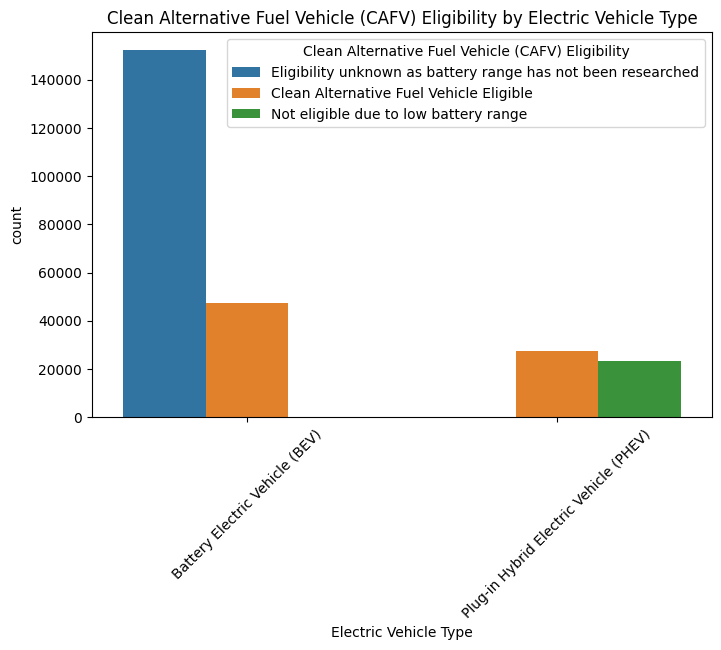

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Electric Vehicle Type", hue="Clean Alternative Fuel Vehicle (CAFV) Eligibility", data=df)
plt.title(f"Clean Alternative Fuel Vehicle (CAFV) Eligibility by Electric Vehicle Type")
plt.xticks(rotation=45)
plt.show()

In [ ]:
for col in categorical_data:
  print(f'Unique values in {col} = {df[col].unique()}')
  print("---------------------------------------------------------------------------------------------------------------\n")
  print("---------------------------------------------------------------------------------------------------------------\n")

Unique values in Make = ['TESLA' 'KIA' 'FIAT' 'TOYOTA' 'CHEVROLET' 'AUDI' 'NISSAN' 'ACURA' 'BMW'
 'FORD' 'RIVIAN' 'MAZDA' 'CHRYSLER' 'VOLVO' 'PORSCHE' 'POLESTAR' 'JEEP'
 'MINI' 'MITSUBISHI' 'HYUNDAI' 'VOLKSWAGEN' 'FISKER' 'LEXUS' 'SMART'
 'HONDA' 'SUBARU' 'MERCEDES-BENZ' 'LAND ROVER' 'LUCID' 'CADILLAC'
 'GENESIS' 'GMC' 'LINCOLN' 'JAGUAR' 'ALFA ROMEO' 'VINFAST' 'DODGE' 'TH!NK'
 'LAMBORGHINI' 'BENTLEY' 'BRIGHTDROP' 'MULLEN AUTOMOTIVE INC.'
 'ROLLS-ROYCE' 'WHEEGO ELECTRIC CARS' 'AZURE DYNAMICS' 'RAM']
---------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------

Unique values in Electric Vehicle Type = ['Battery Electric Vehicle (BEV)' 'Plug-in Hybrid Electric Vehicle (PHEV)']
---------------------------------------------------------------------------------------------------------------

----------------------------------------

<Figure size 1000x600 with 0 Axes>

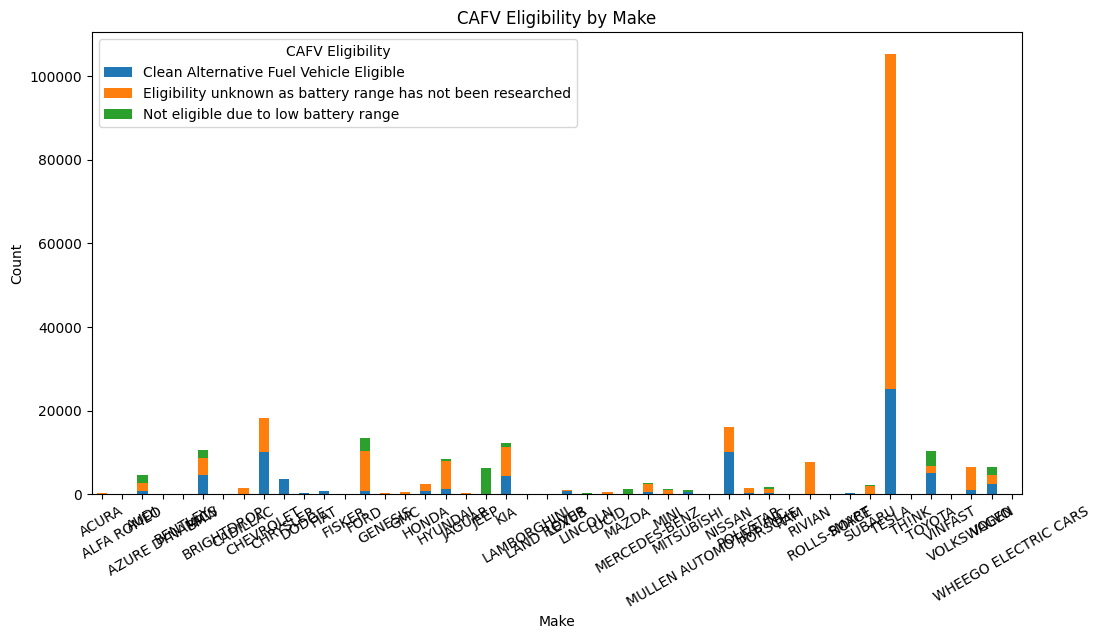

<Figure size 1000x600 with 0 Axes>

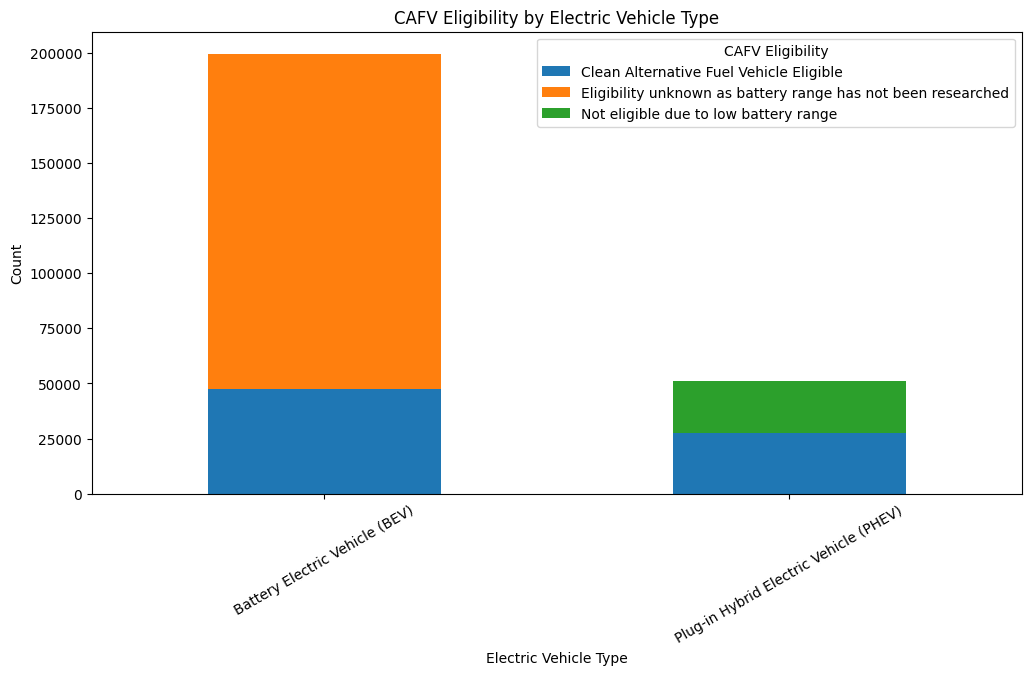

<Figure size 1000x600 with 0 Axes>

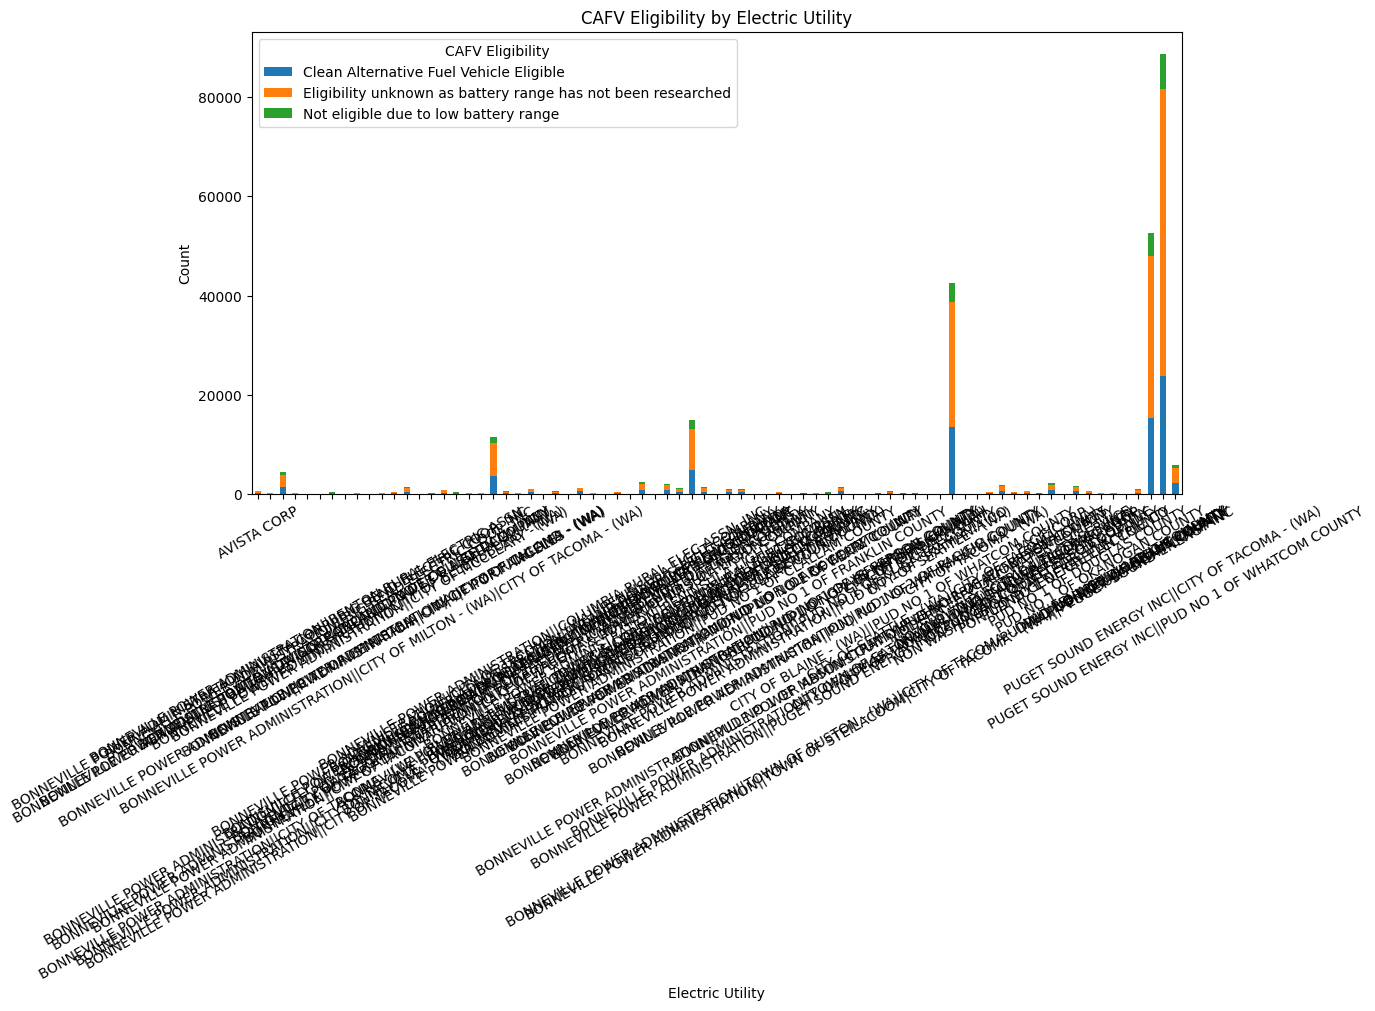

In [ ]:
categorical_cols = ['Make', 'Electric Vehicle Type', 'Electric Utility']

for col in categorical_cols:
    counts = df.groupby([col, 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']).size().reset_index(name='count')

    plt.figure(figsize=(10,6))
    pivot = counts.pivot(index=col, columns='Clean Alternative Fuel Vehicle (CAFV) Eligibility', values='count').fillna(0)
    pivot.plot(kind='bar', stacked=True, figsize=(12,6))

    plt.title(f'CAFV Eligibility by {col}')
    plt.ylabel("Count")
    plt.xticks(rotation=30)
    plt.legend(title='CAFV Eligibility')
    plt.show()

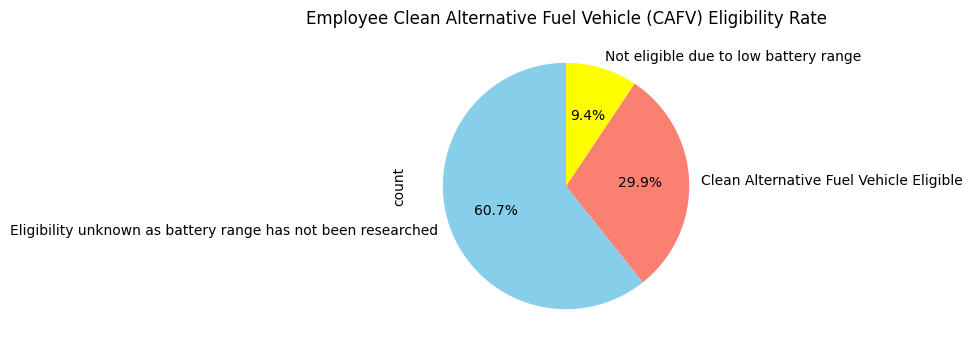

In [ ]:
plt.figure(figsize=(4,4))
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue','salmon', 'yellow'])
plt.title('Employee Clean Alternative Fuel Vehicle (CAFV) Eligibility Rate')
plt.show()


# **Test & Train split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# X = features, y = target
X = df.drop('Clean Alternative Fuel Vehicle (CAFV) Eligibility', axis=1)
y = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']

In [ ]:
# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (200527, 6) (200527,)
Test shape: (50132, 6) (50132,)


In [ ]:
X_train

,Model Year,Make,Electric Vehicle Type,Electric Range,Legislative District,Electric Utility
3265,2024,TESLA,Battery Electric Vehicle (BEV),0.000000,289.0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...
242249,2021,VOLVO,Battery Electric Vehicle (BEV),0.000000,25.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
113013,2022,TESLA,Battery Electric Vehicle (BEV),0.000000,1849.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
108821,2024,KIA,Battery Electric Vehicle (BEV),0.000000,1681.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
96675,2023,TESLA,Battery Electric Vehicle (BEV),0.000000,1849.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
...,...,...,...,...,...,...
122084,2024,TESLA,Battery Electric Vehicle (BEV),0.000000,441.0,PUGET SOUND ENERGY INC
250605,2022,BMW,Plug-in Hybrid Electric Vehicle (PHEV),11.792268,1369.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
68998,2023,CHEVROLET,Battery Electric Vehicle (BEV),0.000000,1296.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
71469,2022,TESLA,Battery Electric Vehicle (BEV),0.000000,1296.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)


In [ ]:
y_train

,Clean Alternative Fuel Vehicle (CAFV) Eligibility
3265,Eligibility unknown as battery range has not b...
242249,Eligibility unknown as battery range has not b...
113013,Eligibility unknown as battery range has not b...
108821,Eligibility unknown as battery range has not b...
96675,Eligibility unknown as battery range has not b...
...,...
122084,Eligibility unknown as battery range has not b...
250605,Clean Alternative Fuel Vehicle Eligible
68998,Eligibility unknown as battery range has not b...
71469,Eligibility unknown as battery range has not b...


# **Encode & Scaling The Data**

In [ ]:
le = LabelEncoder()
for col in X_train.select_dtypes(include=['object']).columns:
    le.fit(pd.concat([X_train[col], X_test[col]], axis=0))
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


In [ ]:
X_train

,Model Year,Make,Electric Vehicle Type,Electric Range,Legislative District,Electric Utility
3265,2024,39,0,0.000000,289.0,35
242249,2021,44,0,0.000000,25.0,73
113013,2022,39,0,0.000000,1849.0,56
108821,2024,20,0,0.000000,1681.0,73
96675,2023,39,0,0.000000,1849.0,56
...,...,...,...,...,...,...
122084,2024,39,0,0.000000,441.0,72
250605,2022,5,1,11.792268,1369.0,56
68998,2023,8,0,0.000000,1296.0,56
71469,2022,39,0,0.000000,1296.0,56


In [ ]:
X_test

,Model Year,Make,Electric Vehicle Type,Electric Range,Legislative District,Electric Utility
42554,2024,39,0,0.000000,1089.0,73
230563,2024,39,0,0.000000,1.0,73
98353,2020,39,0,32.225534,1681.0,73
203663,2020,39,0,31.217348,961.0,73
115057,2023,17,1,11.792268,9.0,60
...,...,...,...,...,...,...
20807,2024,18,0,0.000000,2304.0,73
244411,2024,20,0,0.000000,625.0,73
73542,2022,17,0,0.000000,1296.0,56
249737,2018,8,1,15.911994,729.0,19


In [ ]:
robust_scaler = RobustScaler()
X_train[numeric_data] = robust_scaler.fit_transform(X_train[numeric_data])
X_test[numeric_data] = robust_scaler.transform(X_test[numeric_data])

In [ ]:
X_train

,Model Year,Make,Electric Vehicle Type,Electric Range,Legislative District,Electric Utility
3265,0.25,39,0,0.000000,-0.555556,35
242249,-0.50,44,0,0.000000,-0.738889,73
113013,-0.25,39,0,0.000000,0.527778,56
108821,0.25,20,0,0.000000,0.411111,73
96675,0.00,39,0,0.000000,0.527778,56
...,...,...,...,...,...,...
122084,0.25,39,0,0.000000,-0.450000,72
250605,-0.25,5,1,0.891191,0.194444,56
68998,0.00,8,0,0.000000,0.143750,56
71469,-0.25,39,0,0.000000,0.143750,56


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9991422644219261
